# Overview.
Wind turbine power output is known for having a strong correlation with wind speed. In this project, Simple Linear Regression was built for predicting the turbine response for a given wind speed.  this project will be completed using:

a method from NumPy package that performs least squares fit to data. 
a function from SciPy that uses non-linear least squares to fit a function f to data. 
The notebook also includes an analysis of a data set powerproduction and its preprocessing.

The performance evaluation of the models was conducted using two metrics - R-squared regression score  and Root Mean Squared Error (RMSE). The indicators of a good model are low RMSE and high R-squared regression score.

In [1]:
# Numerical arrays.
import numpy as np

# Models.
from numpy.polynomial.polynomial import Polynomial as poly
from scipy.optimize import curve_fit

# Data frames.
import pandas as pd

from scipy import stats
# Plotting.
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.titlesize"] = 18

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

# Reading the Data and Performing Basic Data Checks.

In [3]:
df = pd.read_csv("powerproduction.txt")

# Display the data frame.
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


The data set has 500 rows and 2 columns with two numerical variables, speed and power, which are represented by real numbers. There are no empty values in the data set

In [4]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The mean speed is 12.59, while the mean power stands at 48.01. Moreover, there is a difference in the scale of the variables: speed has a range between 0.00 to 25.00 and power - between 0.00 and 113.556. This difference will be addressed in the preprocessing.

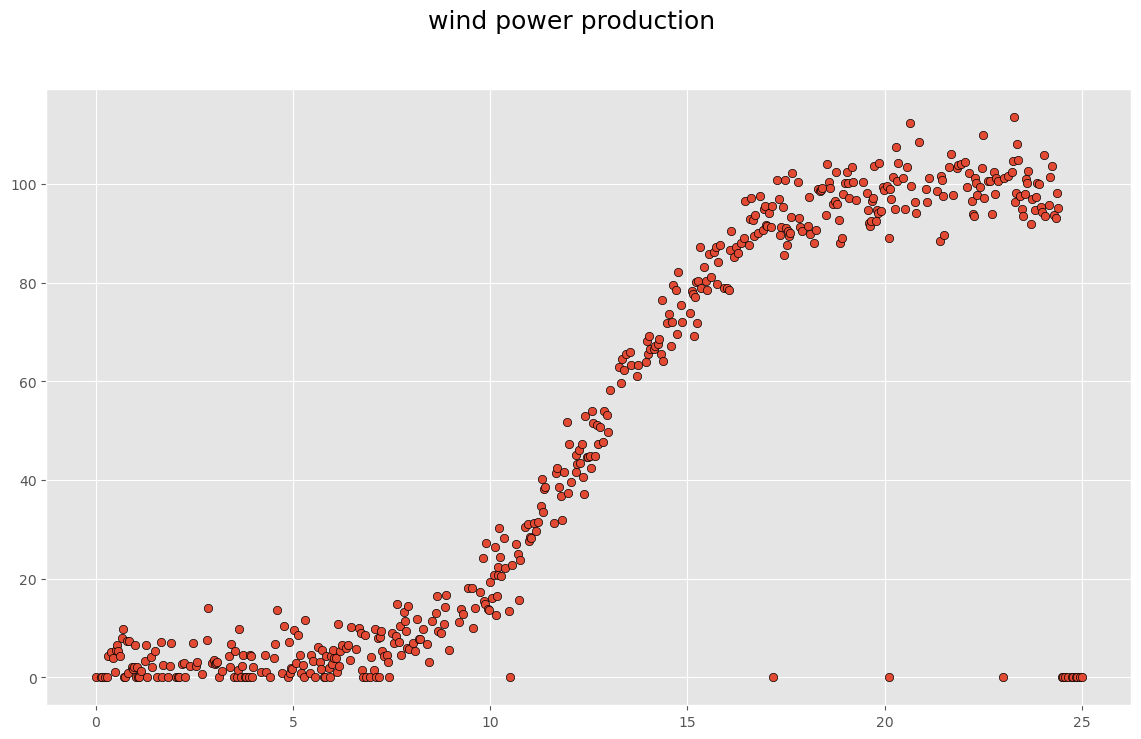

In [6]:
fig, ax = plt.subplots()
fig.suptitle("wind power production")
ax.scatter(df.speed, df.power, edgecolor="black")
plt.show()

The above plot shows that the relationship between Power and Speed predominantly takes an "S"-shape. The power rises dramatically with speed at about 8 m/s and slows when the speed reaches approximately 17 m/s.

Additionally, we can see some outliers where the speed is between 5 m/s and 24 m/s, approximately. However, the power is still 0. The 0 power points for around 25 m/s wind speed may result from shutting down the wind turbine to mitigate damage, and so I will not consider them as outliners.

